In [2]:
import tempfile
from pylab import *
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
import os
import pydub
import scipy
import scipy.io.wavfile
%matplotlib inline
plt.rc("figure",facecolor="w",figsize=(16,2))

In [101]:
mp3 = pydub.AudioSegment.from_mp3('/Users/zihengchen/Desktop/z.mp3')
mp3 = mp3[30000:60000]
mp3.export('/Users/zihengchen/Desktop/z.wav', format="wav")

samplerate, data = scipy.io.wavfile.read('/Users/zihengchen/Desktop/z.wav')
data = data[:,0]/2**15

In [102]:
time = np.arange(0.0, data.size, 1.0) / samplerate

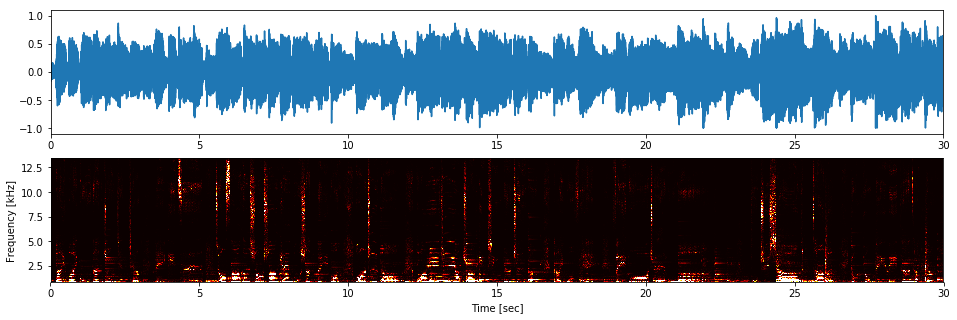

In [127]:
plt.figure(figsize=(16,5))

plt.subplot(2,1,1)
plt.plot(time,data)
plt.xlim(0,time.max())

plt.subplot(2,1,2)
f, t, Sxx = signal.spectrogram(data, samplerate, nperseg=512)
f = f[10:-100]
Sxx = Sxx[10:-100,]
plt.pcolormesh(t, f/1000, Sxx,vmax=1e-5,cmap='hot')
plt.ylabel('Frequency [kHz]')
plt.xlabel('Time [sec]')

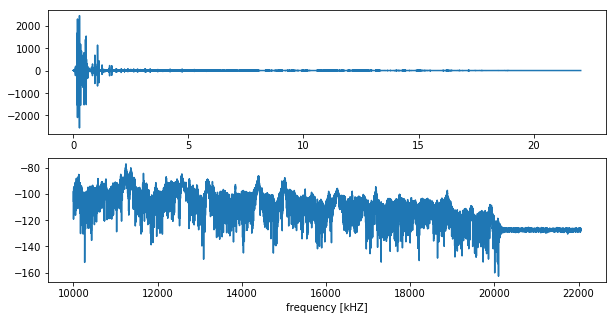

In [100]:
from scipy.fftpack import fft, fftfreq, fftshift
plt.figure(figsize=(10,5))

N,T = data.size, 1/samplerate
freq    = fftshift(fftfreq(N, T))
fourier = fftshift(fft(data))
fourier = fourier[freq>=0]
freq    = freq[freq>=0]


plt.subplot(2,1,1)
plt.plot(freq/1000,fourier.real)

plt.subplot(2,1,2)
fourier = (np.abs(fourier)/N)**2

plt.plot(freq[freq>10000 ],10*np.log10(fourier[freq>10000]))
plt.xlabel("frequency [kHZ]")

In [42]:
abs(1+2j)

2.23606797749979